In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sanikamal/horses-or-humans-dataset")

print("Path to dataset files:", path)

100%|██████████| 307M/307M [00:15<00:00, 21.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sanikamal/horses-or-humans-dataset/versions/1


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

train_generator = ImageDataGenerator().flow_from_directory(
    r'/root/.cache/kagglehub/datasets/sanikamal/horses-or-humans-dataset/versions/1/horse-or-human',
    target_size=(128, 128),
    class_mode='categorical'
)

model.fit(
    train_generator,
    epochs=10
)

image_path = r'/root/.cache/kagglehub/datasets/sanikamal/horses-or-humans-dataset/versions/1/horse-or-human/validation/humans/valhuman01-00.png'
img = load_img(image_path, target_size=(128, 128))
img_array = img_to_array(img)
img_array = img_array / 255.0
image = np.expand_dims(img_array, axis=0)

prediction = model.predict(image)

predicted_class = np.argmax(prediction, axis=1)


if predicted_class >= 0:
    print("HUMAN")
else:
    print("HORSE")


Found 2566 images belonging to 3 classes.
Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 14s 153ms/step - accuracy: 0.4068 - loss: 1578.7638
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 149ms/step - accuracy: 0.4211 - loss: 7.3250
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 147ms/step - accuracy: 0.4085 - loss: 1.1025
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 153ms/step - accuracy: 0.4366 - loss: 0.9752
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 151ms/step - accuracy: 0.4522 - loss: 0.9365
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 147ms/step - accuracy: 0.4709 - loss: 0.9094
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 149ms/step - accuracy: 0.4447 - loss: 0.8874
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step - accuracy: 0.4661 - loss: 0.8643
Epoch 9/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 147ms/step - accuracy: 0.4628 - loss: 0.8525
Epoch 10/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step - accuracy: 0.4599 - loss: 0.8423
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
HUMAN


In [ ]:
def pred_class():
  if predicted_class >= 0:
    return "human"
  else:
    return "horse"
  return pred_class


In [ ]:
image_path = r'/root/.cache/kagglehub/datasets/sanikamal/horses-or-humans-dataset/versions/1/horse-or-human/validation/humans/valhuman01-15.png'
img1 = load_img(image_path, target_size=(128, 128))
img_array = img_to_array(img1)
img_array = img_array / 255.0
image = np.expand_dims(img_array, axis=0)

prediction = model.predict(image)

predicted_class = np.argmax(prediction, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


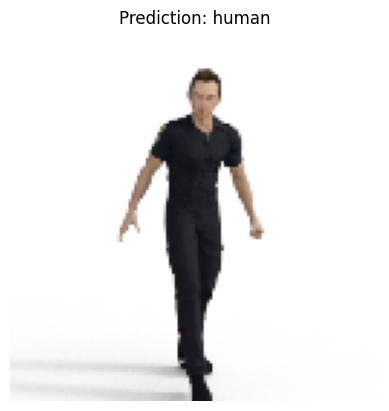

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img1)
plt.title(f'Prediction: {pred_class()}')
plt.axis('off')
plt.show()